# Heart Disease Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## EDA

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

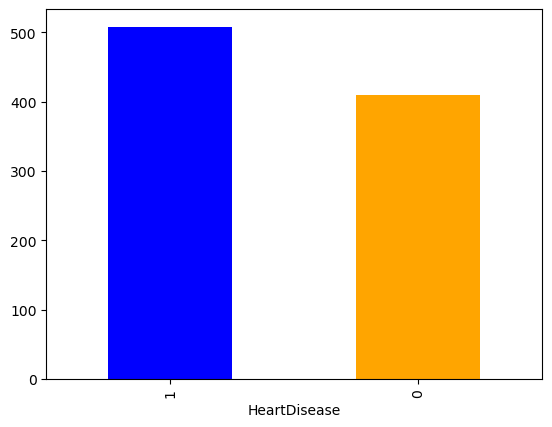

In [8]:
df['HeartDisease'].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

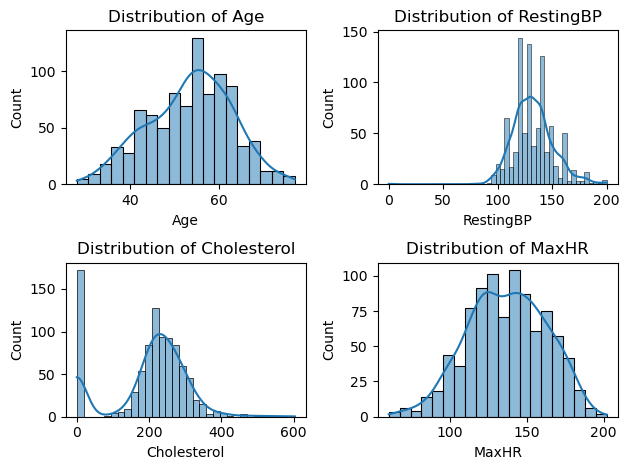

In [11]:
def plotting(var,num):
    plt.subplot(2, 2, num)
    sns.histplot(x=var, data=df, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

In [12]:
df['RestingBP'].value_counts()[0]

np.int64(1)

In [13]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [14]:
df['Cholesterol'].value_counts()[0]

np.int64(172)

In [15]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [16]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean = ch_mean.round(2)
ch_mean

np.float64(244.64)

In [17]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)

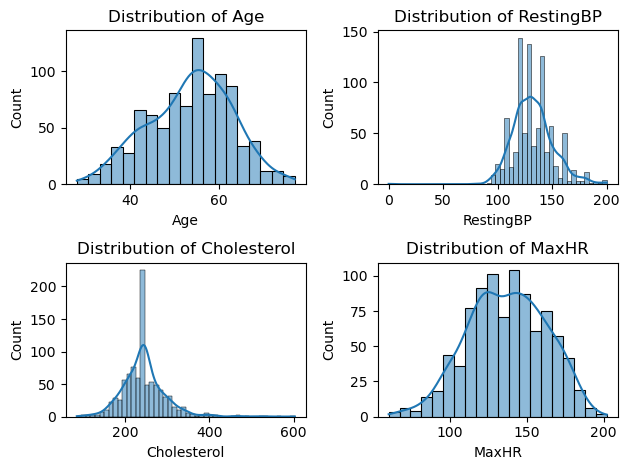

In [18]:
def plotting(var,num):
    plt.subplot(2, 2, num)
    sns.histplot(x=var, data=df, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

In [19]:
Res_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
Res_mean = ch_mean.round(2)
Res_mean

np.float64(244.64)

In [20]:
df['RestingBP'] = df['RestingBP'].replace(0,Res_mean)

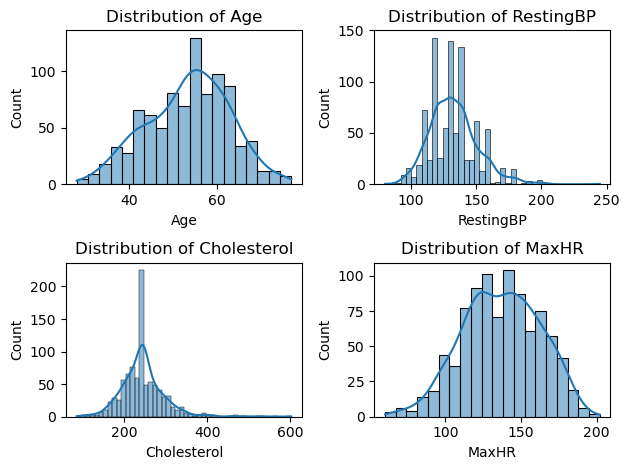

In [21]:
def plotting(var,num):
    plt.subplot(2, 2, num)
    sns.histplot(x=var, data=df, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

In [22]:
print(df['RestingBP'].min())
print(df['RestingBP'].max())

80.0
244.64


In [23]:
print(df['Cholesterol'].min())
print(df['Cholesterol'].max())

85.0
603.0


In [24]:
print(df['Cholesterol'].value_counts()[603])

1


<Axes: xlabel='Sex', ylabel='count'>

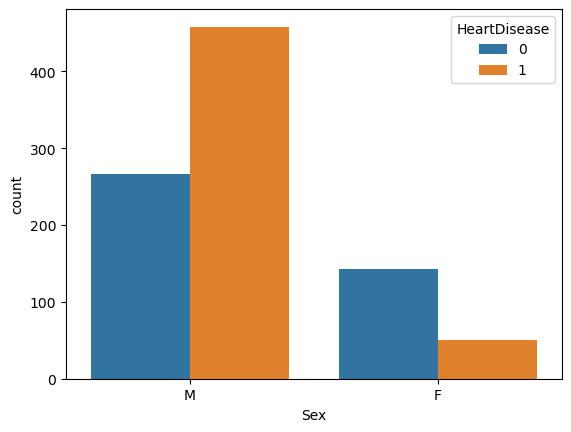

In [25]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

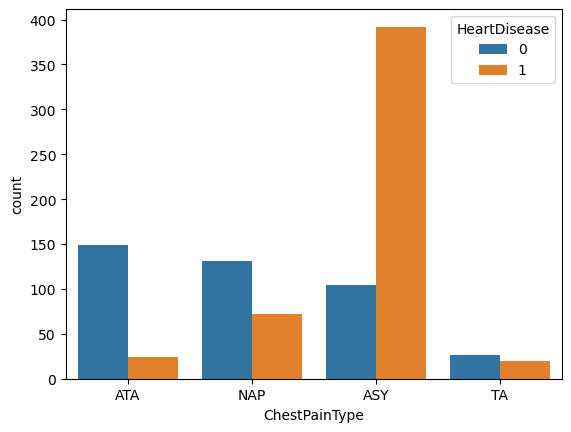

In [26]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

### pip install sheryanalysis==0.1.0

In [27]:
import sheryanalysis as sa
sa.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest